# US ADULT Data set to practice logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data And DO Explotary Data Analysis

In [2]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
train=pd.read_csv('adult-training.csv',names=columns)
test=pd.read_csv('adult-test.csv',skiprows=1,names=columns)
display(train.head())
train.describe()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The Data contain some missing values as '?' so we should preprocess it

In [3]:
train.replace(' ?', np.nan, inplace=True)
test.replace(' ?', np.nan, inplace=True)

The count of missing/Null values in each columns

In [4]:
train.isnull().sum()

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     583
Income               0
dtype: int64

In [5]:
test.isnull().sum()

Age                 0
Workclass         963
fnlgwt              0
Education           0
Education num       0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours/Week          0
Native country    274
Income              0
dtype: int64

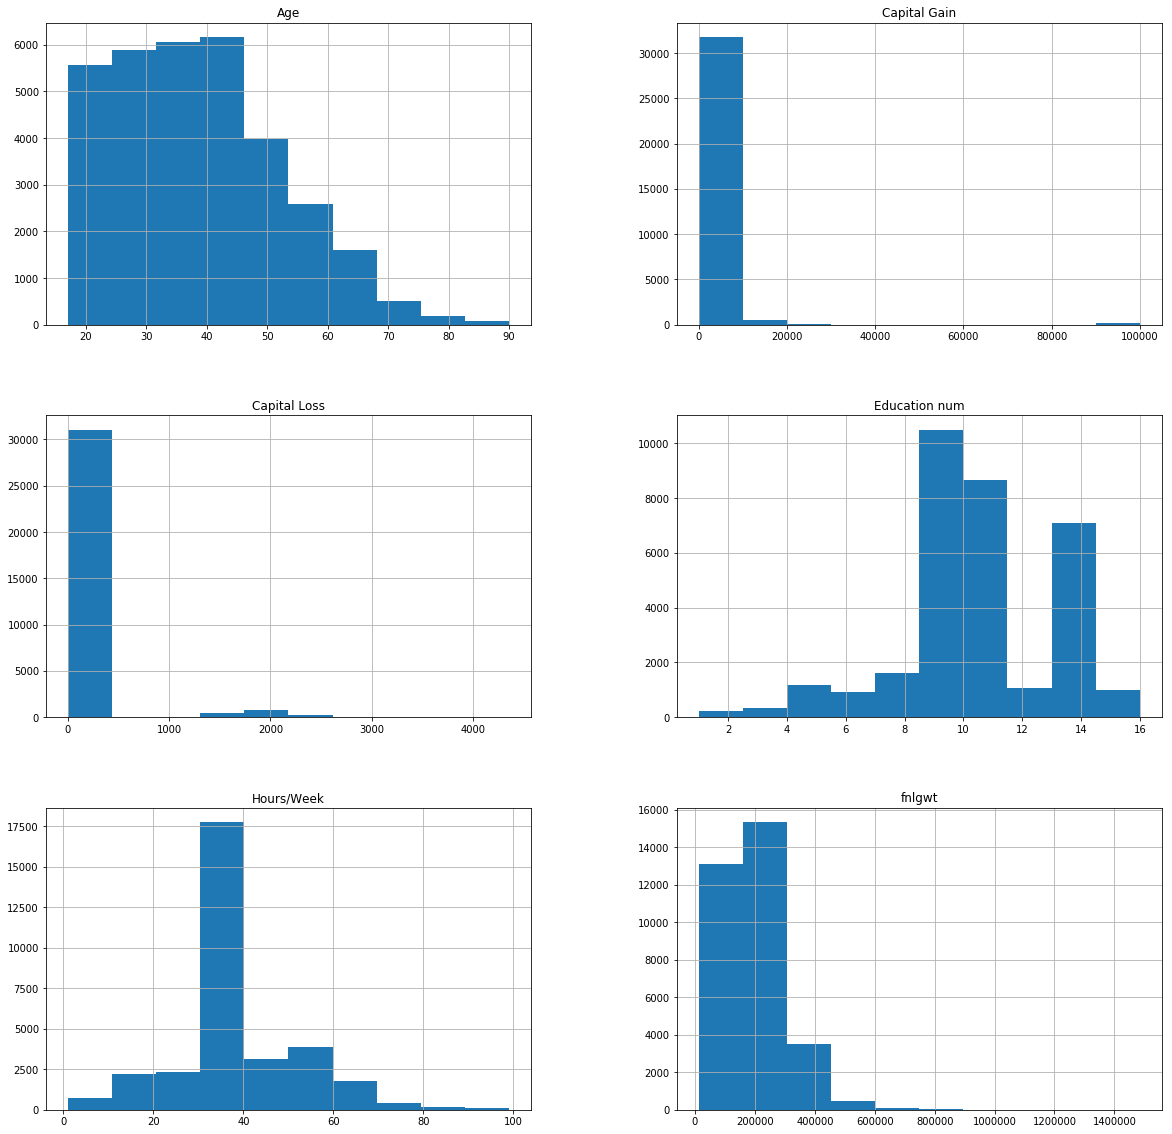

In [6]:
p=train.hist(figsize=(20,20))

we can see the skew ness of age, some feature are in low in frequency so we should feature engineering for some features and scale of fnlgwt feature



Since Skewness can be reduced by StandardScalar

# Feature engineering

In [7]:
#from train.isnull().sum() we came to know that Working class , occupation and Native country has more Null values so replace by 0
train['Workclass'].fillna(' 0', inplace=True)
test['Workclass'].fillna(' 0', inplace=True)

Map ">50"  to 1 or else to 0 

In [8]:
train['Income'] = train['Income'].apply(lambda x: 1 if x==' >50K' else 0)
test['Income'] = test['Income'].apply(lambda x: 1 if x==' >50K' else 0)

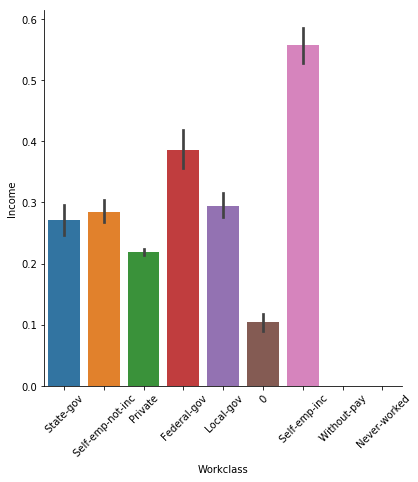

In [9]:
def plot_count(x,y):
    sns.catplot(x=x, y=y, data=train, kind='bar', height=6)
    plt.xticks(rotation=45);
    plt.show()
plot_count('Workclass','Income')

In [10]:
train['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 0                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

There is low frequency in without-paying and Never_worked so merge it

In [11]:
train['Workclass'].replace(' Without-pay',' Never-worked',inplace=True)
test['Workclass'].replace(' Without-pay',' Never-worked',inplace=True)

In [12]:
train['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 0                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Never-worked           21
Name: Workclass, dtype: int64

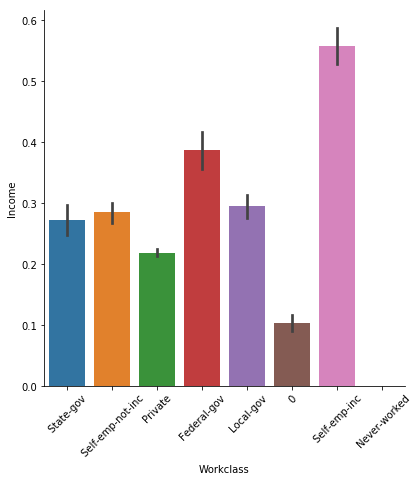

In [13]:
plot_count('Workclass','Income')

Scaling the fnlgwt by using 'log' function

In [14]:
train['fnlgwt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

In [15]:
train['fnlgwt'] = train['fnlgwt'].apply(lambda x: np.log1p(x))
test['fnlgwt'] = test['fnlgwt'].apply(lambda x: np.log1p(x))
train['fnlgwt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlgwt, dtype: float64

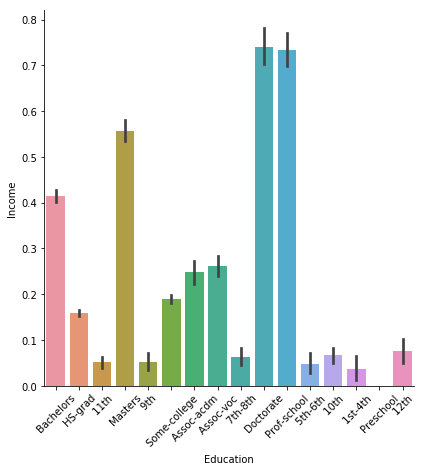

In [16]:
plot_count('Education','Income')

We can see that class 7th-8th ,10th....etc should be merged as 'primary'

In [17]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' Primary'
    else:
        return x

In [18]:
train['Education']=train['Education'].apply(primary)
test['Education']=test['Education'].apply(primary)

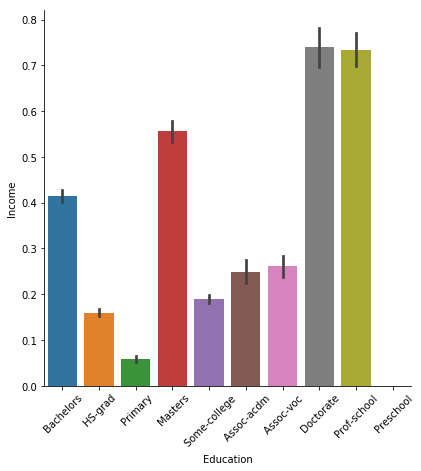

In [19]:
plot_count('Education','Income')

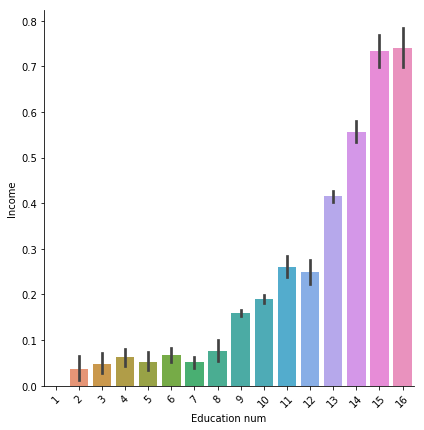

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education num, dtype: int64

In [57]:
plot_count('Education num','Income') 
train['Education num'].value_counts()

the value are reasonable, so no need of modifications in Education num

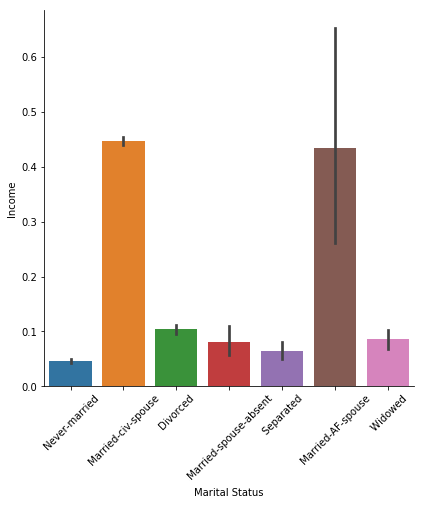

In [21]:
plot_count("Marital Status",'Income')

In [22]:
train['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

Since Married-AF-spouse is reasonable less so combine it with Married-spouse-absent

 Married-civ-spouse       14999
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
Name: Marital Status, dtype: int64


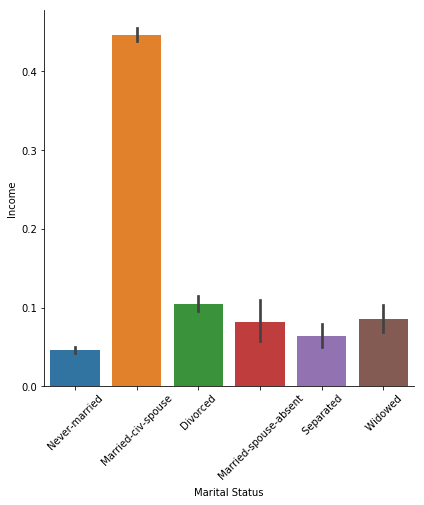

In [23]:
train['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
print(train['Marital Status'].value_counts())
plot_count('Marital Status','Income')

There are missing value in Occupation so we should replace it by " 0" class

In [24]:
train['Occupation'].fillna(' 0', inplace=True)
test['Occupation'].fillna(' 0', inplace=True)

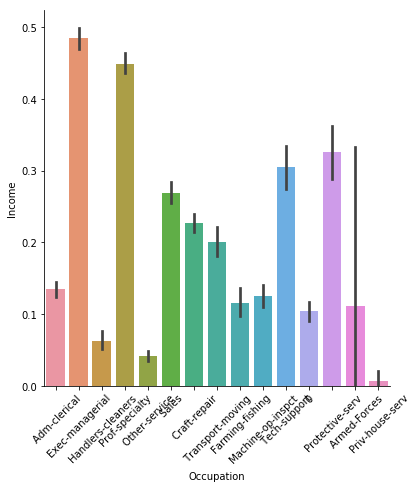

In [25]:
plot_count("Occupation",'Income')

In [26]:
train['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 0                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Since Armed-Forces is less frequency so combine to ' 0'

In [27]:
train['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)
test['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)
train['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 0                    1852
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: Occupation, dtype: int64

In [28]:
train['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [29]:
train['Race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

cleaning Native country colum by removing missing values and feature engineering

In [30]:
train['Native country'].fillna(' 0', inplace=True)
test['Native country'].fillna(' 0', inplace=True)

In [31]:
def native(country):
    if country in [' United-States', ' Cuba', ' 0']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'Poland team'
    
    else: 
        return country

In [32]:
train['Native country'] = train['Native country'].apply(native)
test['Native country'] = test['Native country'].apply(native)

In [33]:
train['Native country'].value_counts()

US             29848
Poor            1415
Western          677
Eastern          386
Poland team      235
Name: Native country, dtype: int64

In [34]:
joint = pd.concat([train, test], axis = 0)

In [35]:
joint.dtypes

Age                 int64
Workclass          object
fnlgwt            float64
Education          object
Education num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Native country     object
Income              int64
dtype: object

In [36]:
categorical_features = joint.select_dtypes(include=['object']).axes[1]

for col in categorical_features:
    print (col, joint[col].nunique())

Workclass 8
Education 10
Marital Status 6
Occupation 14
Relationship 6
Race 5
Sex 2
Native country 5


In [37]:
#one-hot encode
for col in categorical_features:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    joint.drop(col, axis=1, inplace=True)

In [38]:
display(joint.head())
train = joint.head(train.shape[0])
test = joint.tail(test.shape[0])

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: 0,Workclass: Federal-gov,Workclass: Local-gov,...,Race: Black,Race: Other,Race: White,Sex: Female,Sex: Male,Native country:Eastern,Native country:Poland team,Native country:Poor,Native country:US,Native country:Western
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [39]:
Xtrain = train.drop('Income', axis=1)
ytrain = train['Income']

Xtest = test.drop('Income', axis=1)
ytest = test['Income']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

C:\Users\aiman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aiman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\aiman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


# logistic Regression from scratch

In [40]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000, verbose=False):
        self.lr = lr
        self.num_iter = num_iter

    #Hypothesis
    def __sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    #Loss Function
    def __loss(self, h, y):
        return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()

    #fitting values
    def fit(self, X, y):
        intercept = np.ones((X.shape[0], 1))
        X=np.concatenate((intercept, X), axis=1)
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.theta -= self.lr * gradient
    def predict_prob(self, X):
        intercept = np.ones((X.shape[0], 1))
        X=np.concatenate((intercept, X), axis=1)
        return self.__sigmoid(np.dot(X, self.theta))

    #predicting the value
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

In [41]:
reg=LogisticRegression()
reg.fit(Xtrain,ytrain)

In [42]:
pre=reg.predict(Xtest)
print((pre==ytest).mean())

0.787666605245378


# Data Lit assignment  (code as per instructions)

In [58]:
def preprocess(data_file,s=0,p=None):
    columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
    data=pd.read_csv(data_file,names=columns,skiprows=s)
    data.replace(' ?', np.nan, inplace=True)
    data['Workclass'].fillna('0', inplace=True)
    data['Income'] = data['Income'].apply(lambda x: 1 if x==' >50K' else 0)
    data['Workclass'].replace(' Without-pay',' Never-worked',inplace=True)
    data['fnlgwt'] = data['fnlgwt'].apply(lambda x: np.log1p(x))
    def primary(x):
        if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
            return ' Primary'
        else:
            return x
    data['Education']=data['Education'].apply(primary) 
    data['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
    data['Occupation'].fillna(' 0', inplace=True)
    data['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)
    data['Native country'].fillna(' 0', inplace=True)
    def native(country):
        if country in [' United-States', ' Cuba', ' 0']:
            return 'US'
        elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
            return 'Western'
        elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
            return 'Poor' 
        elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
            return 'Eastern'
        elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
            return 'Poland team'
        else:
            return country
    data['Native country'] = data['Native country'].apply(native)
    dic={}
    for i in columns:
        dic[i]=(data[i].min(),data[i].max)
    categorical_features = data.select_dtypes(include=['object']).axes[1]
    for col in categorical_features:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col, prefix_sep=':')], axis=1)
        data.drop(col, axis=1, inplace=True)
    Xtrain = train.drop('Income', axis=1)
    ytrain = train['Income']
    from sklearn.preprocessing import StandardScaler
    if(s!=0):
        scaler=p;
    else:
        scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    return (Xtrain,ytrain,scaler)

In [59]:
def train_with_file(data_file, iters):
    Xtrain,ytrain,dic=preprocess(data_file)
    reg=LogisticRegression(num_iter=iters)
    reg.fit(Xtrain,ytrain)
    return (reg.theta,dic)

In [60]:
def classify(data_file, weights, normalization_params):
    xtest,_,_c=preprocess(data_file,s=1,p=normalization_params)
    intercept = np.ones((xtest.shape[0], 1))
    xtest= np.concatenate((intercept, xtest), axis=1)
    y=1/(np.exp(-np.dot(xtest, weights))+1)
    return y>=0.5

In [62]:
x,y=train_with_file('adult-training.csv',1000)
#print(y)
p=classify('adult-test.csv',x,y)
print((p==ytrain).mean())

C:\Users\aiman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aiman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:52: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


0.8432480574920918


C:\Users\aiman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aiman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:52: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
